# One Piece Real Estate - Price Predictor 

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287780,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703336,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

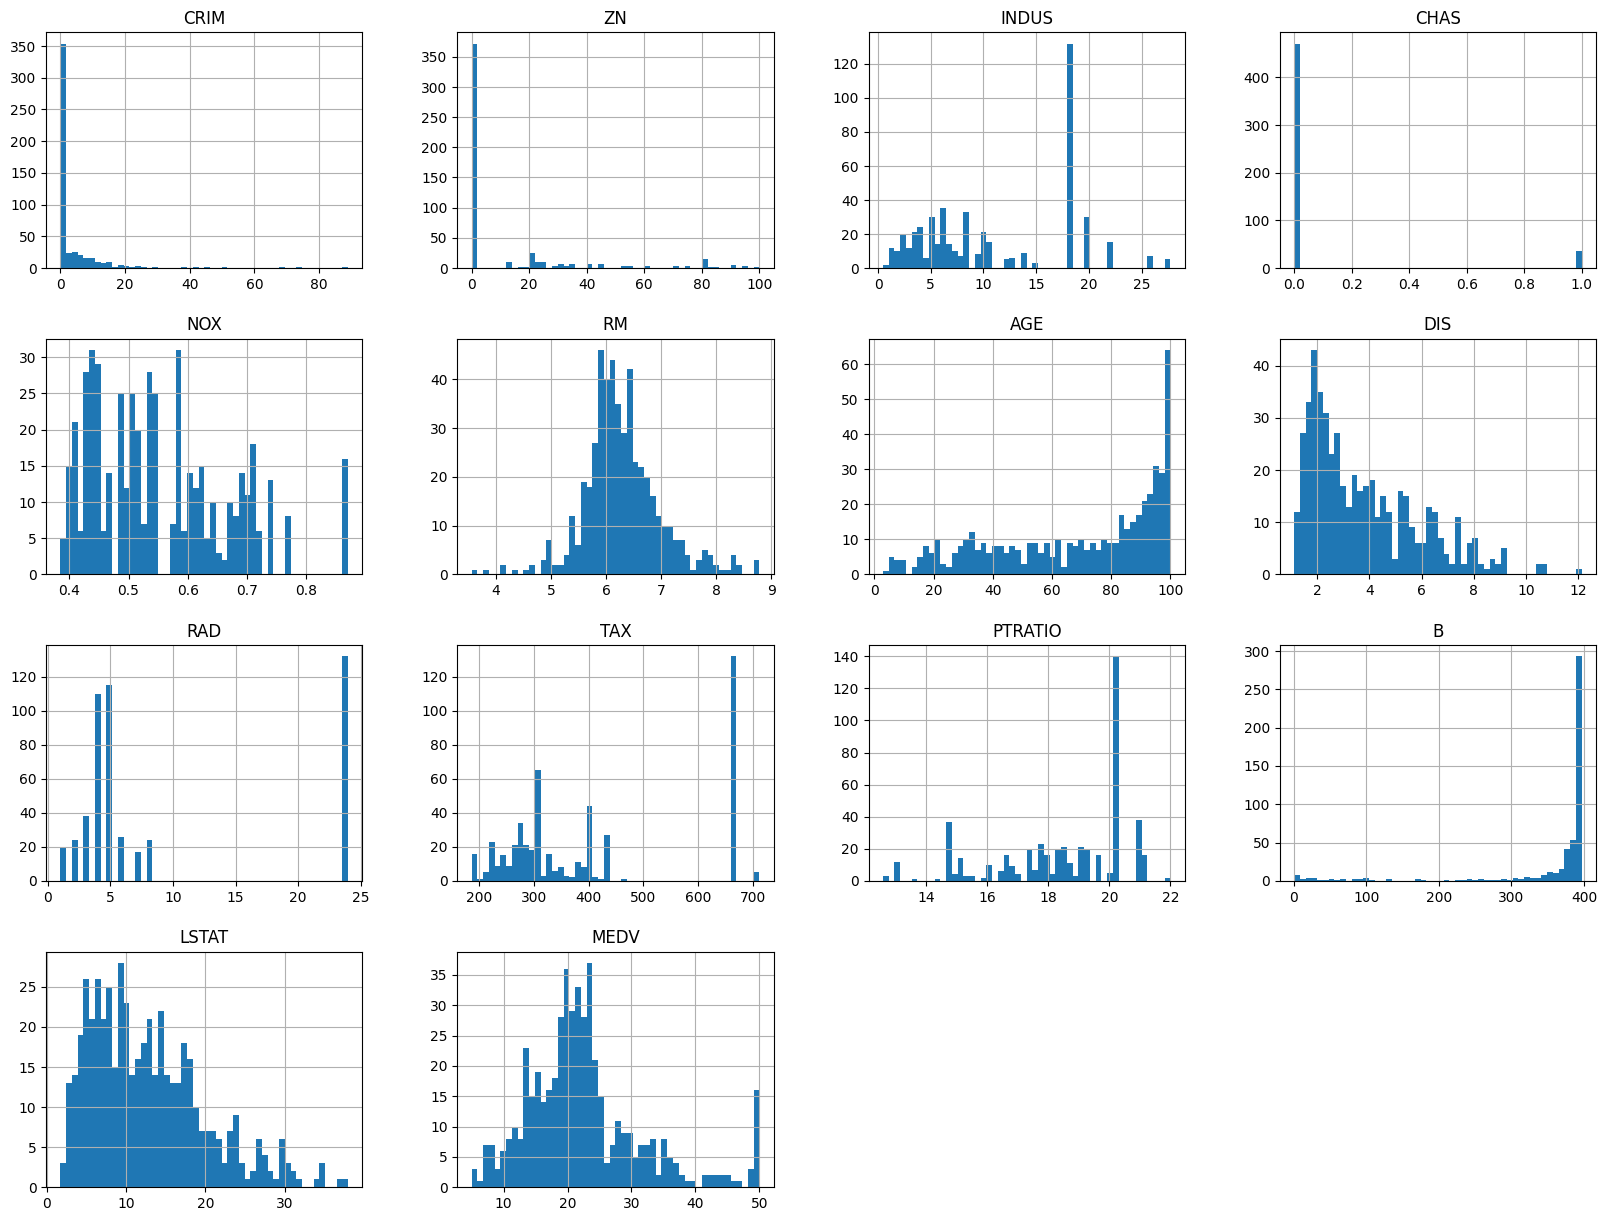

In [9]:
housing.hist(bins=50, figsize=(20, 15))

# Split, train and test data

In [10]:
# how it actually works
# import numpy as np
# def split_train_test(data, test_ratio):
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

In [12]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [13]:
# We can do the above process using sklearn and it is quite easy
from sklearn.model_selection import train_test_split
train_indices, test_indices = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_indices)}\nRows in test set: {len(test_indices)}\n")

Rows in train set: 404
Rows in test set: 102



# CHAS StratifiedShuffleSplit

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
NewSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for test_index, train_index in NewSplit.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

**for train split**

In [15]:
strat_train_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
# 95/7

**for test split**

In [17]:
strat_test_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
# 376/28

In [19]:
# both train and test split values are 13 approx

In [20]:
housing = strat_train_set.copy()

# Looking for Correlations

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.769322
ZN         0.449562
DIS        0.292944
B          0.168425
CHAS       0.043900
CRIM      -0.388768
RAD       -0.414798
AGE       -0.434078
NOX       -0.450991
TAX       -0.525037
INDUS     -0.534485
PTRATIO   -0.573036
LSTAT     -0.726741
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

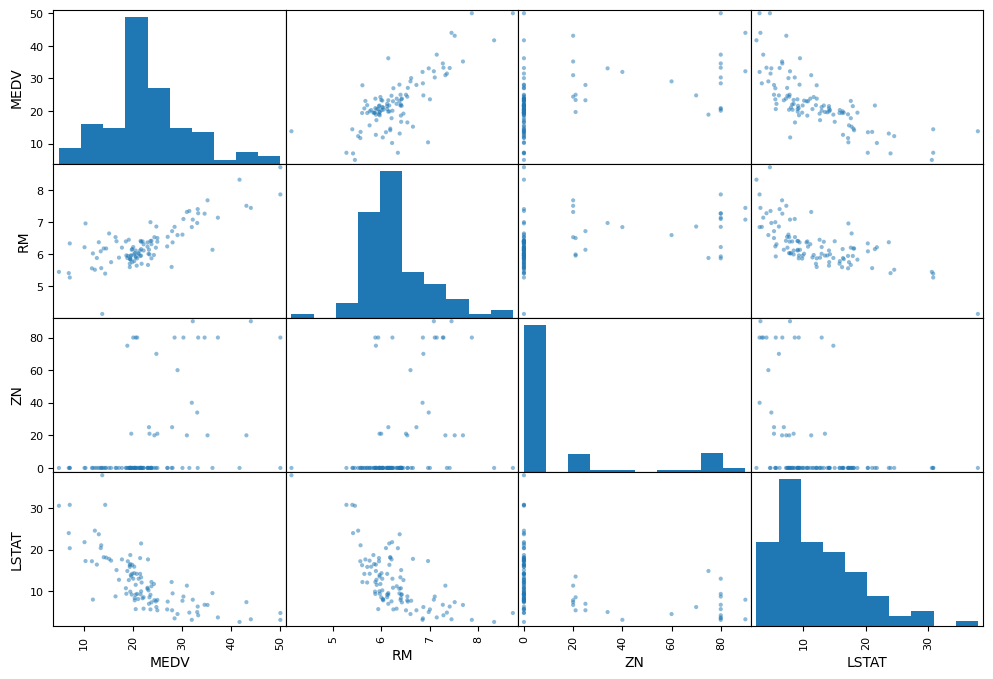

In [23]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

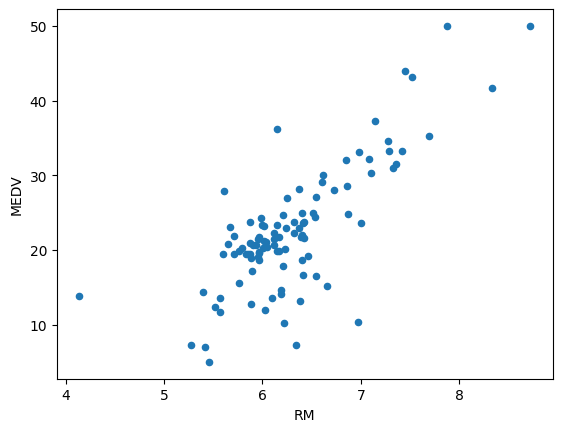

In [24]:
housing.plot(kind="scatter", x='RM',y='MEDV')

In [25]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [26]:
housing_labels.shape

(102,)

# Missing Attributes

# To take care of missing attributes we have three options:
#         1. Get rid of the missing data points
#         2. Get rid of the whole attribute
#         3. Set the value to some value(0, mean or median)

In [27]:
housing.dropna(subset=["RM"]) # Option 1
#Note that missing data points rows are removed. If you add .shape to above you can see

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27


In [28]:
housing.drop("RM", axis=1) # Option 2
# Note that there is no RM column. If you add .shape to above you can see

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
342,0.02498,0.0,1.89,0,0.518,59.7,6.2669,1,422,15.9,389.96,8.65
379,17.86670,0.0,18.10,0,0.671,100.0,1.3861,24,666,20.2,393.74,21.78
223,0.61470,0.0,6.20,0,0.507,80.8,3.2721,8,307,17.4,396.90,7.60
219,0.11425,0.0,13.89,1,0.550,92.4,3.3633,5,276,16.4,393.74,10.50
48,0.25387,0.0,6.91,0,0.448,95.3,5.8700,3,233,17.9,396.90,30.81
...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,86.3,3.4217,2,270,17.8,396.90,5.50
466,3.77498,0.0,18.10,0,0.655,84.7,2.8715,24,666,20.2,22.01,17.15
52,0.05360,21.0,5.64,0,0.439,21.1,6.8147,4,243,16.8,396.90,5.28
121,0.07165,0.0,25.65,0,0.581,84.1,2.1974,2,188,19.1,377.67,14.27


In [29]:
median = housing["RM"].median() # Option 3

In [30]:
housing["RM"].fillna(median)

342    6.540
379    6.223
223    6.618
219    6.373
48     5.399
       ...  
88     7.007
466    5.952
52     6.511
121    6.004
218    5.951
Name: RM, Length: 102, dtype: float64

**Note that the original data is unchanged until we use inplace=True**

In [31]:
housing.shape

(102, 13)

In [32]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.306861,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.665351,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.905000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.540000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000


In [33]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
imp.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imp.statistics_

array([1.76150e-01, 0.00000e+00, 7.76000e+00, 0.00000e+00, 5.15000e-01,
       6.18500e+00, 7.11000e+01, 3.42295e+00, 5.00000e+00, 3.07000e+02,
       1.91500e+01, 3.93740e+02, 1.05650e+01])

In [35]:
X = imp.transform(housing)

In [36]:
housing_tr = pd.DataFrame(X, columns= housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.305667,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662159,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000


In [38]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    float64
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    float64
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
dtypes: float64(13)
memory usage: 10.5 KB


## Scikit-learn Design

there are three types of objects:

   1. Estimators - it estimates some parameters based on a dataset. Eg: imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculate internal parameters
    
   2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.
    
   3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() func which will evaluate the predictions.

## Feature Scaling

there are two types of feature scaling methods:
1. Min-max scaling (Normalizarion)
    (value-min)/(max-min)
    Sklearn provides a class called MinMaxScaler for this
2. Standardization
    (value-mean)/std
    Sklearn provides a class called Standaed Scaler for this

## Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imp', SimpleImputer(strategy="median")),
    #add as many as you want in your pipeline
    ('std_scaler', StandardScaler())
])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape

(102, 13)

## Selecting a desired model for One piece Real Estates

In [42]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]

In [44]:
some_labels = housing_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([19.527, 10.888, 28.506, 23.098, 15.472])

In [47]:
list(some_labels)

[16.5, 10.2, 30.1, 23.0, 14.4]

## Evaluating the model

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [49]:
mse

2.538860627450991

In [50]:
rmse

1.5933802519960485

## Using better evaluation tech - Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([3.778954  , 4.1290426 , 4.90435598, 4.92769602, 2.55123923,
       5.42385396, 5.39782523, 4.34055222, 2.9810182 , 4.59573883])

In [53]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [54]:
print_scores(rmse_scores)

Scores:  [3.778954   4.1290426  4.90435598 4.92769602 2.55123923 5.42385396
 5.39782523 4.34055222 2.9810182  4.59573883]
Mean:  4.303027628378581
Standard deviation:  0.9173398103169865


## Saving the model

In [55]:
from joblib import dump, load
dump(model, "OP.joblib")

['OP.joblib']

## Testing the model on test data

In [56]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predic = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predic)
final_rmse = np.sqrt(final_mse)

In [57]:
final_mse

19.939084905940604

In [58]:
final_rmse

4.465320246739376

In [59]:
prepared_data[0]

array([-0.35082247, -0.49148409, -1.25183452, -0.27144836, -0.21067276,
        0.3556407 , -0.25450164,  1.07434355, -0.91150503,  0.17974455,
       -1.08091535,  0.2995192 , -0.51357301])

## Using the model

In [60]:
import numpy as np
from joblib import dump, load
model = load("OP.joblib")

features = np.array([[-0.35082247, -0.49148409, -8.25183452, -0.27144836, -0.21067276,
        0.0556407 , -0.25450164,  1.07434355, -0.91150503,  0.17974455,
       -1.08091535,  0.2995192 , -0.51357301]])
model.predict(features)

array([19.766])